In [1]:
from sklearn.decomposition import PCA                      #importing PCA
from matplotlib import pyplot as plt
import numpy as np

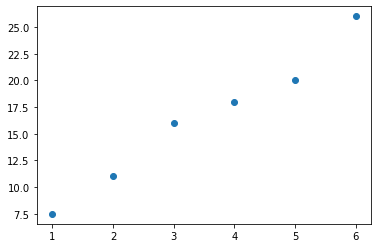

In [2]:
#training data
x1=[1,2,3,4,5,6]                                           #feature 1 values
x2=[7.5,11,16,18,20,26]                                    #feature 2 values
plt.scatter(x1,x2)
plt.show()

In [3]:
x_train=np.c_[x1,x2]                                      #combining x1 and x2 to form a 2d array
x_train

array([[ 1. ,  7.5],
       [ 2. , 11. ],
       [ 3. , 16. ],
       [ 4. , 18. ],
       [ 5. , 20. ],
       [ 6. , 26. ]])

In [4]:
pca=PCA()                                                 #lets call this transformer :)
x_new=pca.fit_transform(x_train)                          #new data
x_new                                                     #as u can see, feature 1 is much higher than feature 2

array([[-9.26049952e+00,  9.65263430e-03],
       [-5.62047228e+00,  2.38560598e-02],
       [-5.36562171e-01, -3.68391297e-01],
       [ 1.65958219e+00,  5.22629108e-02],
       [ 3.85572654e+00,  4.72917119e-01],
       [ 9.90222524e+00, -1.90297426e-01]])

In [5]:
pca.components_                                 #this will give us the lines along which are new axes are based(slope m & c)

array([[ 0.27096719,  0.96258858],
       [ 0.96258858, -0.27096719]])

In [6]:
#getting back original data
pca.inverse_transform(x_new)                    #we got our original data back without any loss :)

array([[ 1. ,  7.5],
       [ 2. , 11. ],
       [ 3. , 16. ],
       [ 4. , 18. ],
       [ 5. , 20. ],
       [ 6. , 26. ]])

In [7]:
#but we wanted to remove features, i.e. we wanted only 1 feature after transform:
pca=PCA(n_components=1)
x_new=pca.fit_transform(x_train)                          #new data
x_new                                                     #only 1 feature now :)

array([[-9.26049952],
       [-5.62047228],
       [-0.53656217],
       [ 1.65958219],
       [ 3.85572654],
       [ 9.90222524]])

In [8]:
pca.components_                                           #only 1 axis :)

array([[0.27096719, 0.96258858]])

In [9]:
#lets see what happens now if we try to get original data back(obviously we won't get the exact data back as we have lost some
#data by removing an axis(feature)):
x_inv=pca.inverse_transform(x_new)      
x_inv                                                     #near original, but not exactly

array([[ 0.99070848,  7.50261555],
       [ 1.97703643, 11.00646421],
       [ 3.35460926, 15.90017805],
       [ 3.94969232, 18.01416153],
       [ 4.54477538, 20.12814502],
       [ 6.18317813, 25.94843564]])

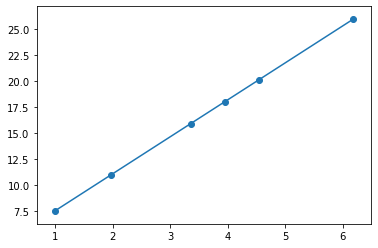

In [10]:
#lets plot this x_inv:
plt.plot(x_inv[:,0],x_inv[:,1])
plt.scatter(x_inv[:,0],x_inv[:,1])
plt.show()                                                #as we can see, this lies on a straight line
                                                          #that is because, pca transformed it into a single line

In [34]:
#we got near enough results to our original data in this case as originally the data points were lying close to the line.
#if they were not lying in such a way that could assume them in a line, the inverted data points would have been highly
#different from original. But for such a data (which can't be assumed to fall on a line) we would never have applied PCA
#as it would have resulted in high loss of data(as already discussed in my notes).